# Timeserie analysis

In [21]:
import numpy as np
import jsonlines as jl
from math import inf

shortest = inf
X = []
with jl.open("final.jsonl") as reader:
    for company in reader:
        if "weekly_prices" in company:
            prices = company["weekly_prices"]["prices"]
            if len(prices) < 80:
                continue
            X.append(prices)
            if len(prices) < shortest:
                shortest = len(prices)
                
for i in range(len(X)):
    if len(X[i]) > shortest:
        X[i] = X[i][:shortest]

X = np.array(X)
X

array([[0.46, 0.45, 0.43, ..., 0.39, 0.37, 0.37],
       [0.38, 0.39, 0.38, ..., 0.37, 0.36, 0.37],
       [1.54, 2.74, 2.38, ..., 0.67, 0.67, 0.63],
       ...,
       [5.96, 5.87, 5.89, ..., 6.08, 6.09, 6.08],
       [2.04, 2.02, 1.92, ..., 2.12, 2.15, 2.05],
       [1.97, 2.11, 2.35, ..., 2.85, 2.7 , 2.88]], shape=(432, 80))

### Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler

X = (StandardScaler().fit_transform(X.T)).T

## Build Empirical Covariance Matrix and Null Hypothesis

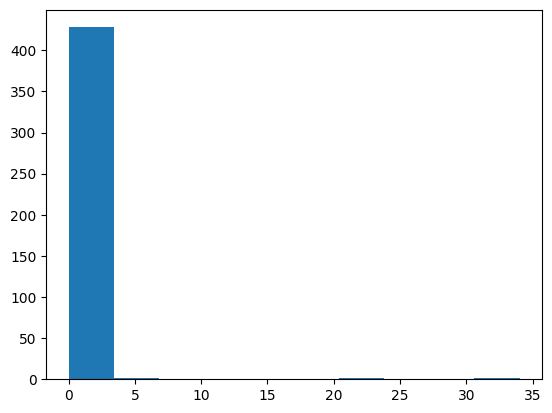

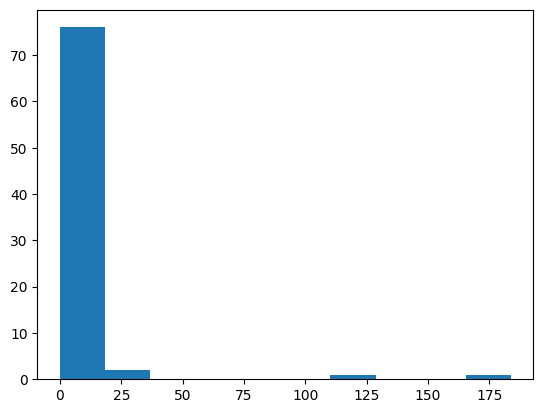

In [23]:
import matplotlib.pyplot as plt

n_examples = X.shape[0]
n_features = X.shape[1]

C = (X @ X.T) / n_examples
C_f = (X.T @ X) / n_features

# Compute eigenvalues
eigenvalues_C = np.linalg.eigvalsh(C)
eigenvalues_C_f = np.linalg.eigvalsh(C_f)

# Sort eigenvalues in descending order
eigenvalues_C = np.sort(eigenvalues_C)[::-1]
eigenvalues_C_f = np.sort(eigenvalues_C_f)[::-1]
# Plot eigenvalues
plt.hist(eigenvalues_C, label="Eigenvalues of C")
plt.show()

plt.hist(eigenvalues_C_f, label="Eigenvalues of C_f")
plt.show()